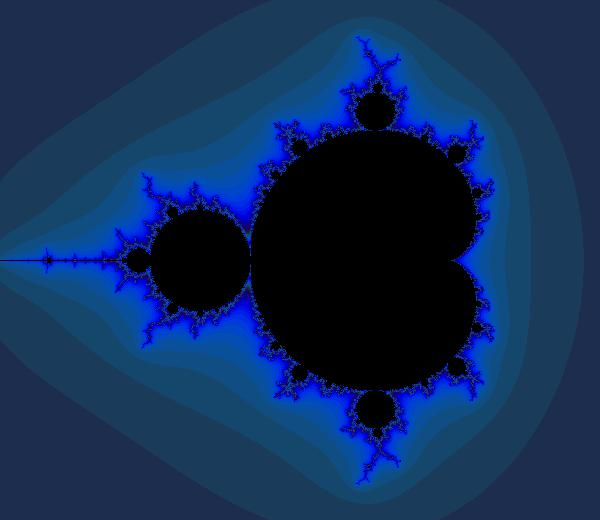

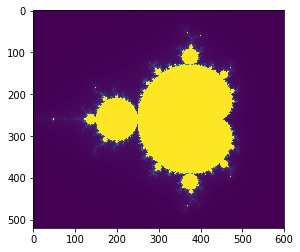

In [3]:
## 프랙탈은 부분의 구조가 전체구조와 유사한 기하학적 형태 (망델브로 집합 역시 프렉탈 중 하나)
## 1. Z의 초깃값은 0이다 Z(0)=0
## 2. 복소수 c를 현재 좌표로 설정한다. 카르테시안 평면에서 수평 축은 실수부를 의미하며 수직 축은 허수부를 의미한다.
## 3. 다음의 과정을 반복한다. =>> Z(n+1)=Z(n)2제곱+c
## 이 과정을 텐서플로로 구현
## 왜 안 되는지 모르겠다 시바....
## 난처 1

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


## with out book 책에 없는거...
import PIL.Image
from io import BytesIO
from IPython.display import Image, display

def DisplayFractal(a, fmt='jpeg'):
  """반복 횟수들의 배열을 다채로운 프랙탈 이미지로 나타냅니다."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  display(Image(data=f.getvalue()))
## without book



sess = tf.InteractiveSession() ## 세션 생성 (without book)


Y,X=np.mgrid[-1.3:1.3:0.005,-2:1:0.005] ## 망델브로 집합을 표현할 복소수 그리드 생성
## 실수부는 -1.3 ~ 1.3, 허수부는 -2j 부터 +1j 까지의 영역
## 이미지 픽셀으 모든 부분은 서로 다른 복소수 z 값이 할당


Z = X+1j*Y  
c= tf.constant(Z.astype(np.complex64))
zs = tf.Variable(c) ## 다른 변수는 0으로 초기화
ns = tf.Variable(tf.zeros_like(c,tf.float32))

## 명시적 초기화  (without book)
tf.global_variables_initializer().run()


## run 메소드를 호출해 변수를 초기화
# 새로운 z값의 계산: z^2 + x
zs_=zs*zs+c

## 순회 종료 조건을 설정
## not_diverged = tf.complex_abs(zs_) < 4
not_diverged = tf.abs(zs_) < 4

step = tf.group(zs.assign(zs_), ns.assign_add(tf.cast(not_diverged, tf.float32)))

for i in range(200): step.run()
                
DisplayFractal(ns.eval())

plt.imshow(ns.eval())
plt.show()


In [8]:
## 난처 2

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



## 실수부, 허수부 복소수 평면 정의
Y,X = np.mgrid[-2:2:0.005, -2:2:0.005]
## 현재 지점 좌표 정의
Z = X+1j*Y

## 쥘리아 집합에서 사용하는 Z는 상수텐서로 정의
Z=tf.constant(Z.astype("complex64"))

## 입력텐서는 다음과 같이 연산
zs = tf.Variable(Z)
ns = tf.Variable(tf.zeros_like(Z, "float32"))


## 그래프 생성
# 양방향 세션 생성
tf.InteractiveSession()
tf.global_variables_initializer().run()


# 쥘리아 집합
c= complex(0.0,0.75)
zs_ = zs*zs -c


# 그룹연산

not_diverged = tf.abs(zs_) < 4
step = tf.group(zs.assign(zs_)), ns.assign_add(tf.cast(not_diverged, "float32"))

#step = tf.convert_to_tensor(step)



# for 문을 돌리지 않으면 그래프는 나오지만 연산이 되지 않는다.
# tuple 은 상수값이라 어떠한 변화도 줄 수 없는데 run 을 실행함으로써 생기는 문제 같다.
#for i in range(200): 
#    step.run()
    
plt.imshow(ns.eval())
plt.show()



TypeError: Expected float32, got <tf.Operation 'group_deps_6' type=NoOp> of type 'Operation' instead.

In [9]:
# 미분계수 계산

import tensorflow as tf

# 변수 x 정의
x= tf.placeholder(tf.float32)

# 함수 정의
y=2*x*x

# y와 x를 매개변수로 gradients 함수 호출
var_grad = tf.gradients(y,x)

# 미분계수 연산을 위해 세션을 생성
with tf.Session() as session:
    var_grad_val = session.run(var_grad,feed_dict={x:1})
    # x가 1일때의 미분 값은 다음과 같이 계산할 수 있다.


print (var_grad_val)



[4.0]


[[ 0.8764739   0.14352834  0.18616915 ...,  0.37378967  0.47719252
   0.25882649]
 [ 0.15364647  0.0668056   0.33932984 ...,  0.71840751  0.72298729
   0.67100179]
 [ 0.62144494  0.34510434  0.49250138 ...,  0.31753457  0.61398172
   0.09182131]
 ..., 
 [ 0.69350934  0.82181585  0.36628926 ...,  0.21708727  0.27383733
   0.88673341]
 [ 0.39547348  0.5227046   0.31056285 ...,  0.98205602  0.98504925
   0.2943536 ]
 [ 0.59125149  0.34585536  0.56696975 ...,  0.26896358  0.04209292
   0.78322458]]


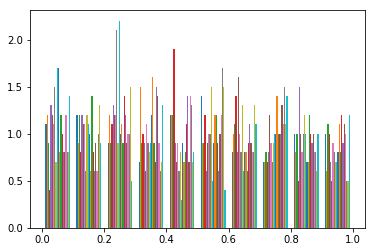

In [11]:
## 난수
# 머신러닝 학습  알고리즘에서는 난수는 매우 중요

# 균일분포
# random_uniform(shape,minval,maxval,dtype,seed,name)

import tensorflow as tf
import matplotlib.pyplot as plt

# 변수는 1차원 텐서이며 100개의 값이 0부터 1사이의 균일 분포로 동일한 확률로 분포되도록 구성한다.
uniform = tf.random_uniform([100,20],minval=0,maxval=1,dtype=tf.float32)
# 세션 정의
sess = tf.Session()


# eval() 을 통해 uniform 텐서를 연산한다. 시각화
with tf.Session() as session:
    print (uniform.eval())
    plt.hist(uniform.eval(),normed=True)
    plt.show()





[[-3.03358865  0.93260193  4.2475996  ...,  0.60957265  0.48066741
  -1.79679406]
 [-0.05817271 -1.10455883 -1.48169482 ...,  1.54868305  0.30055359
  -2.05936766]
 [ 1.52284527  1.11326885 -0.96125025 ..., -0.60762143 -4.91959238
   3.79084659]
 ..., 
 [-1.51919866  2.37588239  4.92791796 ...,  0.97379231 -0.65050954
  -2.23720717]
 [-4.41282415  2.82173657 -1.51716411 ...,  1.05882788 -2.51269293
   1.30047405]
 [ 0.66997552 -0.7844516   2.84753609 ..., -2.12503386  1.44206977
  -0.59313554]]


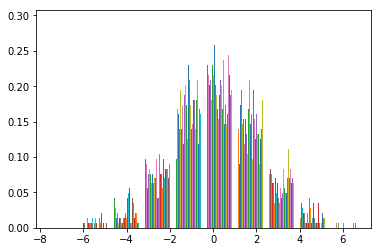

In [14]:
# 정규분포 (가우시안 분포)
# 0 에 가까운 값을 더 많이 갖게 난수를 분포시켜야할때 사용하는 분포

import tensorflow as tf
import matplotlib.pyplot as plt

# 평균값이 0, 표준편차가 2인 정규분포, 크기가 100인 1차원텐서를 random_normal이용해 정의한다.
norm = tf.random_normal([100,100],stddev=2)


# eval() 을 통해 uniform 텐서를 연산한다. 시각화
with tf.Session() as session:
    print (norm.eval())
    plt.hist(norm.eval(),normed=True)
    plt.show()





In [18]:
# 시드를 이용한 난수 생성
# 앞의 2 난수는 확률이 적용되지 않는 결정적 알고리즘에 의해 생성된 의사 난수이다.
# 의사난수는 시드값에 따라 항상 동일한 순서로 난수를 생성해낸다.
# 재현이 필요한 프로그램 디버깅에서 유용하다.

# 균일 분포를 정의한다.
uniform_with_seed = tf.random_uniform([1], seed=1)
uniform_without_seed = tf.random_uniform([1])

# uniform_with_seed 에서 정의한 균일분포는 시드값으로 1를 사용했다.

print ("First Run")
with tf.Session() as first_session:
    print("uniform with (seed = 1)= {}".format(first_session.run(uniform_with_seed)))
    print("uniform with (seed = 1)= {}".format(first_session.run(uniform_with_seed)))
    print("uniform without seed = {}".format(first_session.run(uniform_without_seed)))
    print("uniform without seed = {}".format(first_session.run(uniform_without_seed)))

print ("Second Run")
with tf.Session() as second_session:
    print("uniform with (seed = 1)= {}".format(second_session.run(uniform_with_seed)))
    print("uniform with (seed = 1)= {}".format(second_session.run(uniform_with_seed)))
    print("uniform without seed = {}".format(second_session.run(uniform_without_seed)))
    print("uniform without seed = {}".format(second_session.run(uniform_without_seed)))

First Run
uniform with (seed = 1)= [ 0.23903739]
uniform with (seed = 1)= [ 0.22267115]
uniform without seed = [ 0.08525634]
uniform without seed = [ 0.78436065]
Second Run
uniform with (seed = 1)= [ 0.23903739]
uniform with (seed = 1)= [ 0.22267115]
uniform without seed = [ 0.11229479]
uniform without seed = [ 0.42767131]


Tensor("random_uniform_2:0", shape=(1,), dtype=float32)
Tensor("random_uniform_3:0", shape=(1,), dtype=float32)


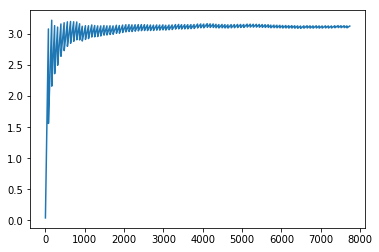

In [15]:
## 몬테 카를로기법
# 난수 생성방법 중 하나로 산술확률적인 기법, 고성능 과학연산에 사용

import tensorflow as tf

trials = 100
hits = 0

# 의사난수 생성
x = tf.random_uniform([1],minval=-1,maxval=1,dtype=tf.float32)
y = tf.random_uniform([1],minval=-1,maxval=1,dtype=tf.float32)
pi = []

print(x)
print(y)
sess = tf.Session()

## 원주율 구하기

with sess.as_default():
    for i in range(1,trials):
        for j in range(1, trials):
            if x.eval()**2+y.eval()**2 < 1 :
                hits = hits+1
                pi.append((4*float(hits)/i)/trials)
    plt.plot(pi)
    plt.show()


## 몬테카를로 기법을 통해 원주율 파이로 출력값이 수렴하는 과정


In [17]:
## 편미분 방정식 풀기

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# 500 * 500 연못의 사각형을 가정한다.
N = 500

u_init = np.zeros([N,N],dtype=np.float32)

# 40개의 임의의 빗방울을 떨어뜨린다고 가정한다.
for n in range(400):
    a,b = np.random.randint(0,N,2)
    u_init[a,b] = np.random.uniform()


# 초기 연못을 시각화
plt.imshow(U.eval())
plt.shot()

# 텐서 정의
ut_init = np.zeros([N,N],dtype=np.float32)






NameError: name 'U' is not defined

In [37]:

# 모델 생성

# 시뮬레이션 스템마다 적용되는 학습 매개변수 정의
eps = tf.placeholder(tf.float32, shape=())
# 모델에서 사용하는 damping 계수에 대한 변수 정의
damping = tf.placeholder(tf.float32, shape=())

# 변수 재정의
U = tf.Variable(u_init)
Ut = tf.Variable(ut_init)

## 편미분 함수 정의, 연못에 빗방울이 떨어지는 과정을 시간 경과에 따라 정의한 수식
U_ = U+eps+Ut
Ut_ = Ut+eps+(laplace(U)-damping*Ut)

step = tf.group(U.assign(U_), Ut.assign(Ut_))

## 그래프 실행

# 변수 초기화
tf.global_variables_initializer().run()


for i in range(1000):
    step.run({eps:0.03, damping:0.04})
    if i % 50 == 0 :
        clear_output()
        plt.imshow(U.eval())
        plt.show()

NameError: name 'laplace' is not defined

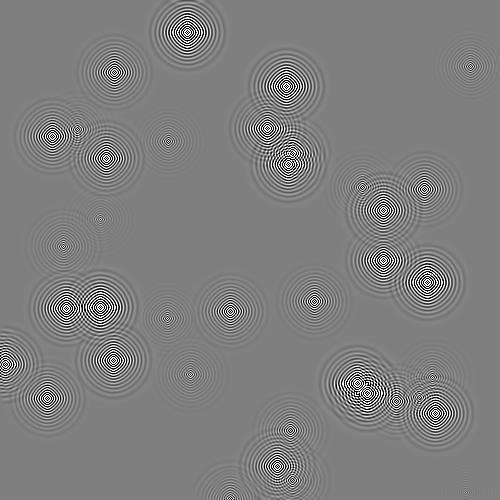